In [1]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from src.globals import *
from src.evaluation import plot_rpcurves

In [6]:
df_imu = pd.read_parquet(path_imu_results)
df_motor = pd.read_parquet(path_motor_results)
df_series = pd.read_parquet(path_series)

In [7]:
# Assuming precentage outliers?
df_results = cal_outliers_threshold(df_imu, [f'if_{sensor}' for sensor in imu_sensors], 0.6)
df_series = df_series.merge(df_results, on=['seqid'])
df_series

,seqid,anomaly,imu_timeindex_bin_max,imu_timeindex_max,motor_timeindex_bin_max,motor_timeindex_max,if_acceleration,if_gravity,if_gyroscope,if_magnetic,if_rotation
0,2024.09.16|00.01.03,none,4057,87.869543,4137,87.874620,106,19,126,255,219
1,2024.09.16|00.02.37,none,4059,87.903883,4138,87.901387,135,27,58,259,219
2,2024.09.16|00.04.10,none,4066,88.047784,4144,88.036256,113,19,115,249,230
3,2024.09.16|00.05.43,none,4059,87.900167,4138,87.890858,115,39,91,241,220
4,2024.09.16|00.07.16,none,4062,87.965710,4141,87.966528,123,27,101,255,231
...,...,...,...,...,...,...,...,...,...,...,...
356,2024.09.16|23.53.08,none,4054,87.796884,4133,87.796802,113,14,167,246,231
357,2024.09.16|23.54.38,none,4053,87.775992,4132,87.775525,103,14,125,244,222
358,2024.09.16|23.56.09,none,4059,87.899140,4138,87.898750,127,19,115,255,231
359,2024.09.16|23.57.39,none,4057,87.860938,4136,87.860925,115,18,108,255,231


In [8]:
cols = [f'if_{x}' for x in imu_sensors]
rpc_dict = { colname : precision_recall_curve(df_series['anomaly'] != "none", df_series[colname]) for colname in cols}

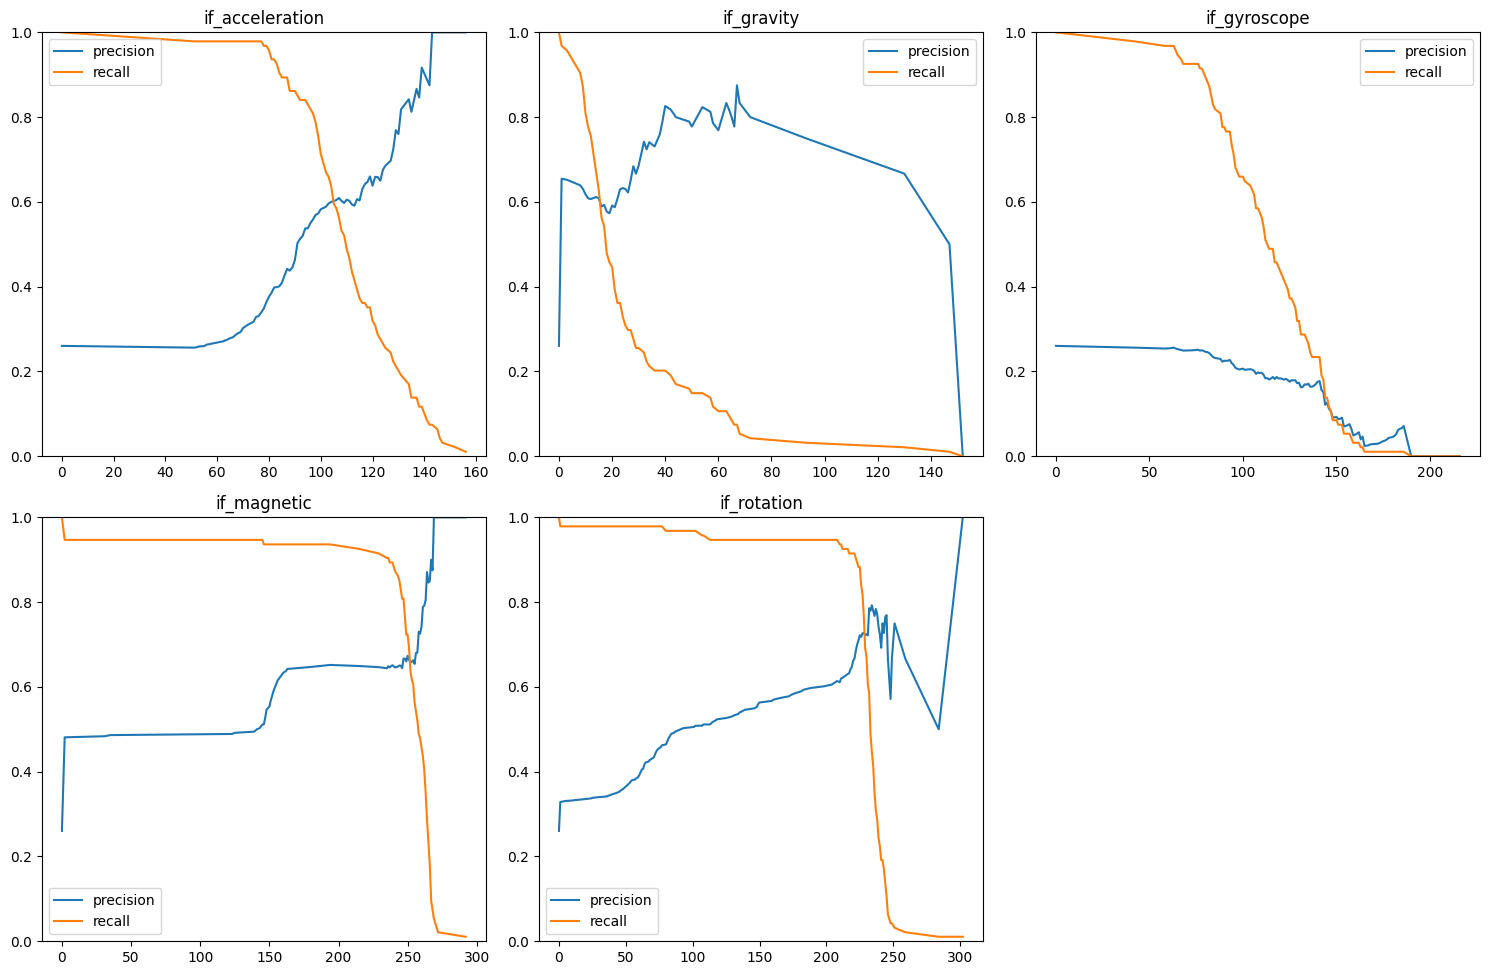

In [10]:
plot_rpcurves(rpc_dict)